In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import glob

In [90]:
image_files = ['cat.jpg', 'mouse.jpg', 'pair_boot.jpg', 'rabbit.jpeg', 'rabbit2.png']
images = [cv2.imread(f, cv2.IMREAD_GRAYSCALE) for f in image_files]
image_templates = []
image_templates.append(images[0][435:475,120:205])
image_templates.append(images[1][0:1,0:10])
image_templates.append(images[2][0:1,0:10])
image_templates.append(images[3][350:380,430:450])

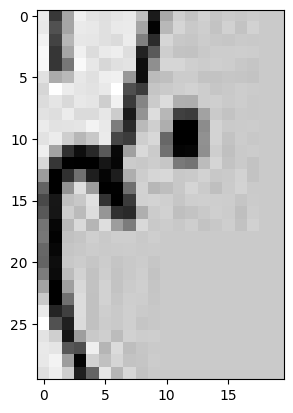

In [91]:
plt.imshow(image_templates[3], cmap='gray')

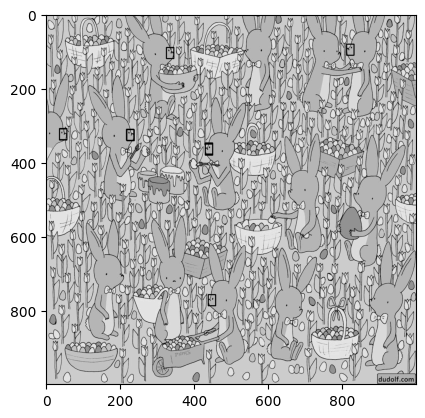

In [110]:
res1 = cv2.matchTemplate(images[3], image_templates[3], cv2.TM_CCOEFF_NORMED)
## flip the template
image_templates[3] = cv2.flip(image_templates[3], 1)
res2 = cv2.matchTemplate(images[3], image_templates[3], cv2.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where(np.logical_or(res1 >= threshold, res2 >= threshold))
image = images[3].copy()
for pt in zip(*loc[::-1]):
    cv2.rectangle(image, pt, (pt[0] + image_templates[3].shape[1], pt[1] + image_templates[3].shape[0]), (0, 0, 255), 2)
plt.imshow(image, cmap='gray')